<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-02-Deep-Learning-Frameworks/blob/main/03_NN_Introduction_to_Libraries_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Introduction to Libraries: Keras

## Decision Tree:  Choosing a Framework for Neural Networks

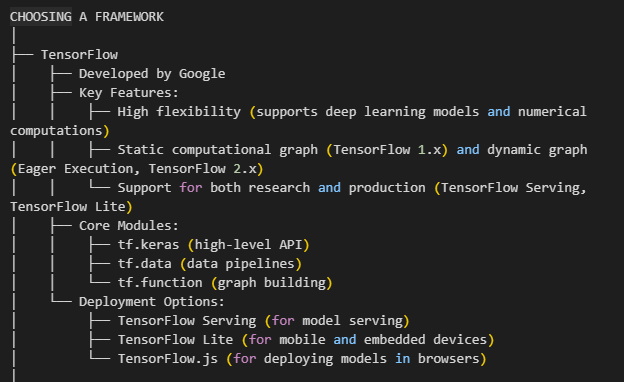

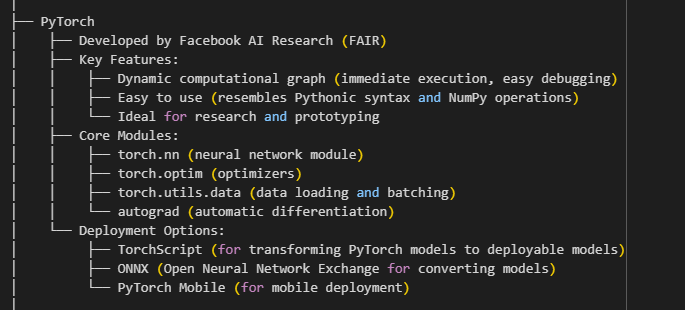

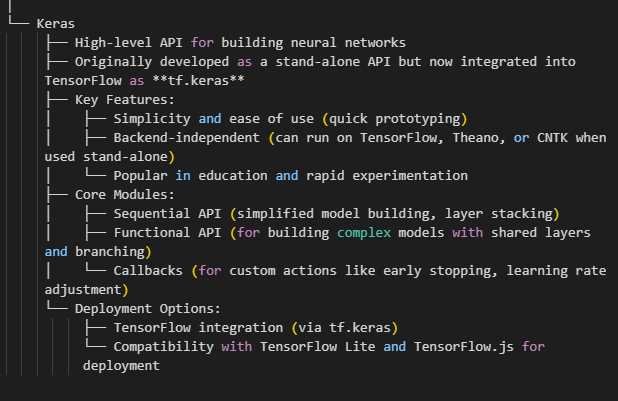

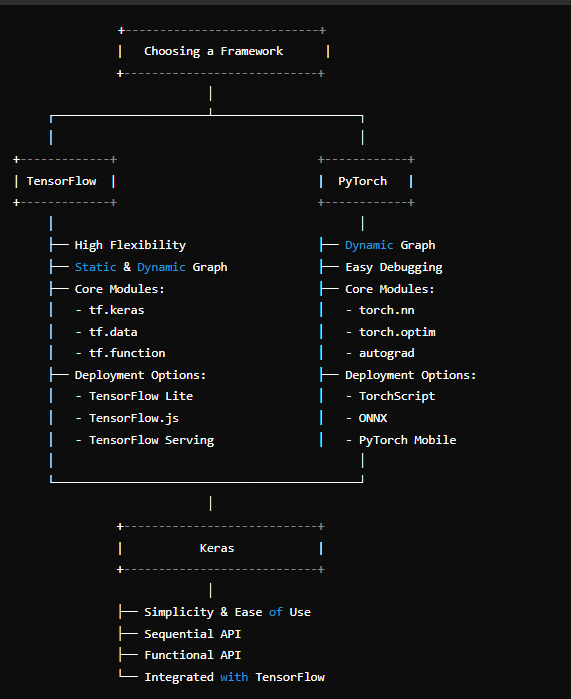

## **Introduction to Learning Keras: A Comprehensive Overview**

Keras is a high-level API for building and training deep learning models in Python. Initially a standalone framework, Keras has now become an integral part of TensorFlow (`tf.keras`). Keras combines simplicity with flexibility, making it an ideal choice for both beginners and experienced developers. This guide will cover the essentials of Keras, helping you to quickly master its core concepts and apply them to build deep learning models.

---



## **Why Learn Keras?**

### 1. **User-Friendly and Simple Syntax**
Keras is designed to make deep learning accessible, with a clean, easy-to-understand syntax. This simplicity allows you to focus on the experimentation process, rather than the technical complexities.

### 2. **Modularity**
Keras allows for modular model building, where different components (like layers, optimizers, and loss functions) can be mixed and matched. This flexibility promotes rapid experimentation with different model architectures.

### 3. **Extensibility**
Advanced users can extend Keras by adding custom layers, activation functions, and loss functions, making it highly adaptable to a wide range of projects.

### 4. **Integration with TensorFlow**
By integrating with TensorFlow, Keras allows you to leverage TensorFlow's scalability, distributed training, and robust deployment pipelines.

### 5. **Pre-trained Models**
Keras offers easy access to a variety of pre-trained models, like **VGG**, **ResNet**, and **Inception**, through its `keras.applications` module. These models can be used for transfer learning and fine-tuning tasks.

### 6. **Cross-Platform and Backend Support**
Keras runs seamlessly across different platforms and can scale from CPUs to GPUs and TPUs, making it highly versatile.

---



## **Core Concepts and Terminologies in Keras**



### **1. Keras API Models**



##### **Sequential API**

The Sequential API is ideal for building simple feedforward neural networks where layers are stacked one after another. This API is particularly useful for tasks where each layer feeds directly into the next layer.


In [ ]:

###### **Example: Creating a Simple Sequential Model**

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

#**Explanation**:
#- `Dense(64, activation='relu')`: This creates a fully connected layer with 64 neurons and uses the ReLU activation function.
#- `input_shape=(784,)`: The input shape is specified for the first layer, where each input has 784 features.
#- `Dense(10, activation='softmax')`: The output layer has 10 units (for classification into 10 classes), and `softmax` is used for multi-class classification.


In [ ]:

###### **Compiling the Sequential Model**

#Before training the model, it needs to be compiled. This involves specifying the optimizer, loss function, and performance metrics.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#**Explanation**:
#- **Optimizer**: The `adam` optimizer is an adaptive optimization algorithm.
#- **Loss function**: `sparse_categorical_crossentropy` is used for multi-class classification with integer labels.
#- **Metrics**: The model will track accuracy during training.





#### **Functional API**


The Functional API is more flexible than the Sequential API and is used when you need to build complex architectures like multi-input models, multi-output models, or models with shared layers.


In [ ]:

###### **Example: Building a Model with Functional API**

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input
inputs = Input(shape=(784,))

# Define a series of layers
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

# Define output layer
outputs = Dense(10, activation='softmax')(x)

# Create a model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#**Explanation**:
#- **Inputs**: Defined using `Input(shape=(784,))`, which specifies the shape of the input.
#- **Layers**: The layers are defined and connected explicitly by calling them as functions on the input or other layers.
#- **Outputs**: The model’s output is defined with the `Dense(10, activation='softmax')` layer, specifying that this is a multi-class classification problem with 10 classes.
#- **Model**: The `Model` class is used to create the model by specifying the input and output layers.




### **2. Layers in Keras**

In Keras, layers are the fundamental building blocks for creating neural network models. Each layer processes data and passes it to the next, transforming it into a form that's useful for solving the task at hand (e.g., classification, regression, etc.). Keras offers a wide variety of layers that can be used to build complex neural networks.

- **Dense Layer**: Fully connected layer.
- **Convolutional Layer**: Extracts features from images (e.g., `Conv2D`).
- **Recurrent Layers**: For sequential data (e.g., `LSTM`, `GRU`).
- **Dropout Layer**: Prevents overfitting by randomly disabling neurons.
- **Pooling Layers**: Reduces the spatial size of feature maps (e.g., `MaxPooling2D`).



#### **2.1 Dense (Fully Connected) Layer**
The **Dense** layer is the most basic layer type in Keras, where every input node is connected to every output node. It is primarily used in feed-forward neural networks.

- **Arguments**:
  - `units`: Number of neurons in the layer.
  - `activation`: Activation function (e.g., `relu`, `sigmoid`, `softmax`).
  - `input_shape`: Shape of the input data (needed only for the first layer).


In [ ]:

# **Example**:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))  # Output layer for classification

#In the above example, the input has 784 features, and the Dense layer outputs a 64-dimensional vector with the ReLU activation function. The output layer contains 10 units with softmax activation for multi-class classification.




#### **2.2 Convolutional Layers**
Convolutional layers are widely used in computer vision tasks, as they help in extracting spatial features from images. Keras provides several convolutional layers, such as `Conv1D`, `Conv2D`, and `Conv3D`, for different types of data.




##### **2.2.1 Conv2D (2D Convolution Layer)**
Used for image data, `Conv2D` applies a convolution operation over 2D input, such as an image.

- **Arguments**:
  - `filters`: Number of output filters (feature maps).
  - `kernel_size`: Size of the convolution window (e.g., `(3,3)`).
  - `strides`: Step size of the convolution operation.
  - `padding`: Padding type (`valid` or `same`).



In [ ]:
# Importing necessary classes from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Initializing the Sequential model
# Sequential is a linear stack of layers. We use this to define the structure of the neural network,
# where we can add layers one by one in order.
model = Sequential()

# Adding a 2D Convolutional layer to the model

# Arguments:
#   filters=32: The number of output filters (or feature maps) in the convolution. This means that 32 different filters will be learned by the model during training.

#   kernel_size=(3, 3): The size of the 2D convolution window (3x3). The kernel (filter) will slide over the input image and capture important features like edges or textures.

#   activation='relu': The activation function to apply after the convolution operation. ReLU (Rectified Linear Unit) is commonly used in CNNs to introduce non-linearity by converting negative values to zero, allowing the model to    learn more complex patterns.

#   input_shape=(28, 28, 1): The shape of the input image. (28, 28, 1) means the input images are 28x28 pixels in size with a single color channel (grayscale). If the input were RGB images, it would be (28, 28, 3).

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# The first layer must define the input shape of the data it will receive. Subsequent layers
# will automatically infer the input shape from the previous layer's output.
# In this example, the input image is grayscale (1 channel) with a resolution of 28x28 pixels.

# After this Conv2D layer, the output shape will be (26, 26, 32). The spatial dimensions (26, 26) are reduced because of the (3x3) kernel size and no padding applied (default padding is 'valid'). The 32 indicates that there are 32 feature maps learned from the image.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


** Observation: Why the output shape is (26,26,32) **

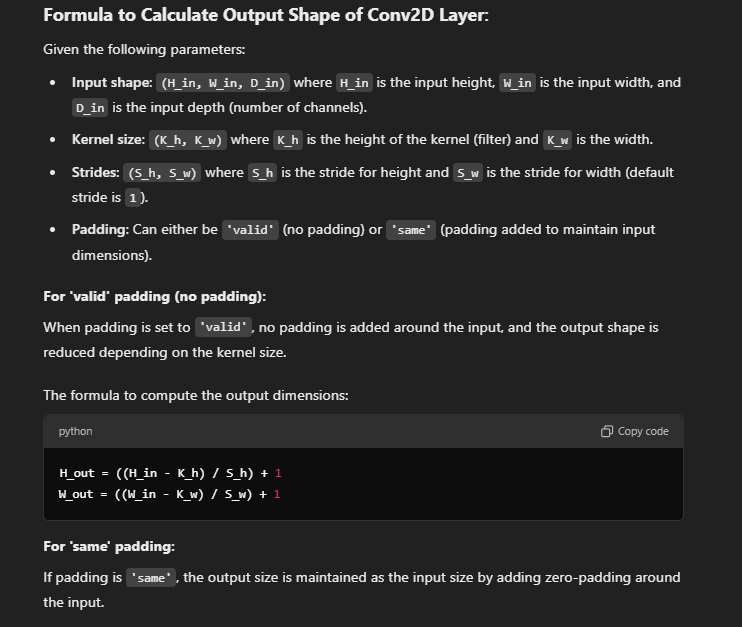

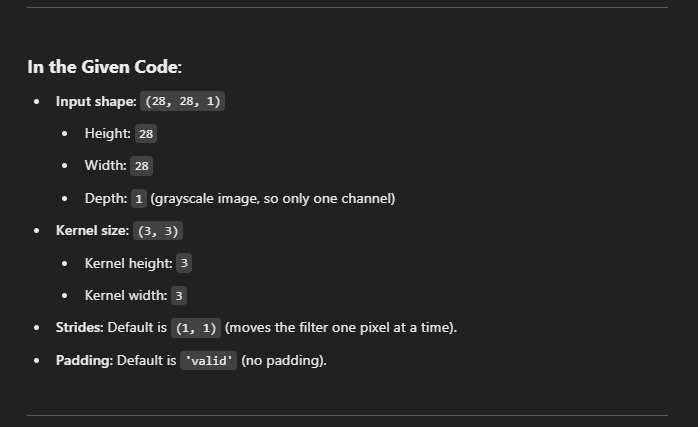

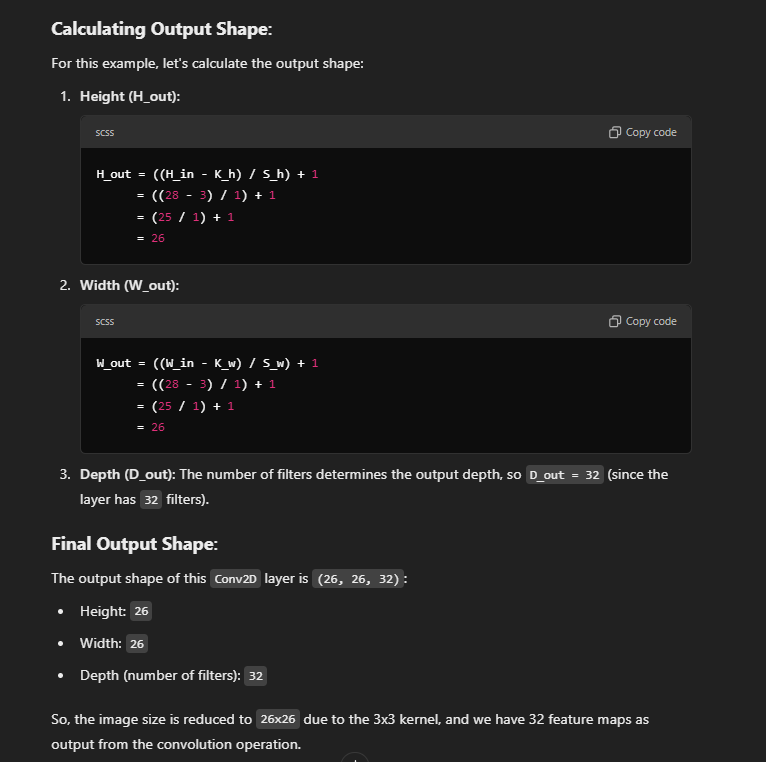



##### **2.2.2 Conv1D (1D Convolution Layer)**
`Conv1D` is used for sequential data, such as time-series or text data. It performs a 1D convolution over input sequences.



In [ ]:
# Import necessary modules from the Keras library
from tensorflow.keras.models import Sequential  # Sequential is used to define a linear stack of layers.
from tensorflow.keras.layers import Conv1D     # Conv1D is used to apply a 1D convolution layer, suitable for sequential data.

# Initialize a Sequential model
model = Sequential()  # Creates an empty Sequential model to which we will add layers.

# Add a Conv1D layer to the model
model.add(Conv1D(
    filters=64,                 # Number of filters (or kernels) to apply. Each filter detects specific features in the input.
    kernel_size=3,              # Size of the convolution window (3 consecutive timesteps in this case).
    activation='relu',          # Activation function applied to the output. 'relu' stands for Rectified Linear Unit, which introduces non-linearity to the model.
    input_shape=(100, 64)       # Shape of the input data. (100 timesteps, 64 features per timestep).
))

# Detailed explanation:
# - `input_shape=(100, 64)` means that the input to this layer is a sequence of 100 timesteps, where each timestep has 64 features (e.g., in time-series data or sequential data like text).
# - `filters=64` defines the number of output filters (feature maps). Each filter is applied across the sequence to learn specific patterns in the input data.
# - `kernel_size=3` means that the convolution window will span 3 timesteps. The layer will slide this window across the sequence to compute the convolution output.
# - `activation='relu'` applies the ReLU activation function to the output of the convolution operation. ReLU introduces non-linearity, which helps the model learn complex patterns.



#### **2.3 Pooling Layers**
Pooling layers are used to reduce the spatial dimensions (width and height) of the feature maps while retaining important information. This reduction helps in reducing computation and preventing overfitting.




##### **2.3.1 MaxPooling2D**
This layer applies a max-pooling operation, which takes the maximum value from each window in the input feature map.

- **Arguments**:
  - `pool_size`: Size of the pooling window (e.g., `(2, 2)`).
  - `strides`: Step size of the pooling operation (default is the same as `pool_size`).


In [ ]:
# Example

# Importing necessary modules from the Keras library
from tensorflow.keras.models import Sequential  # Sequential is a linear stack of layers.
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # Conv2D is a 2D convolution layer, MaxPooling2D is a 2D max pooling layer.

# Initializing a Sequential model
model = Sequential()  # Sequential means layers are stacked one after the other.

# Adding a 2D Convolutional layer
model.add(Conv2D(
    filters=32,                # Number of filters or kernels to apply, resulting in 32 output feature maps.
    kernel_size=(3, 3),         # The size of the filter (3x3), meaning the convolution will be applied with a 3x3 window.
    activation='relu',          # ReLU (Rectified Linear Unit) is the activation function, which introduces non-linearity.
    input_shape=(28, 28, 1)     # Shape of the input data. This is for a grayscale image of size 28x28 pixels (1 channel for grayscale).
))

# Adding a 2D Max Pooling layer
model.add(MaxPooling2D(
    pool_size=(2, 2)  # The pool size of (2x2) means that the input is downsampled by taking the maximum value in each 2x2 window.
))

# Explanation of the operations:
# 1. The Conv2D layer will take the input image of size 28x28x1 and apply 32 filters (each of size 3x3).
#    The result will be 32 different feature maps (28x28) after applying the convolution operation.
# 2. The MaxPooling2D layer will downsample these 32 feature maps by a factor of 2 (reducing their size from 28x28 to 14x14).
#    This pooling operation helps reduce the spatial dimensions and extract important features while maintaining the number of channels (32).



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Explanation of the above code:**

Imagine you have a collection of pictures that are 28 by 28 pixels in size, and these are black and white (so each picture only has one layer of information). Now, we want to teach a computer how to "see" and recognize patterns in these images, just like how humans can recognize shapes or objects.

Here’s what the code is doing:

1. **Setting up the model**:  
   First, we start with a "blank slate" where we will stack layers of instructions, one on top of the other. Think of it as creating a recipe where each step depends on the previous one. This is what we call a "Sequential" model—it’s a step-by-step process.

2. **First step (Convolution layer)**:
   - In this step, we ask the computer to look at small parts of the image, specifically 3x3 pixel sections, and try to spot patterns like edges, corners, or textures.
   - We give the computer 32 sets of these "glasses" (called **filters**) that will each focus on different aspects of the image. Each of these filters is like a pattern-finding tool that helps the computer learn.
   - After the computer looks through each set of "glasses," it creates 32 new versions of the image, where each version highlights a different pattern it found.
   - We also apply a trick (called **ReLU**) that ignores negative values (because they’re not useful for pattern detection), so only the important parts of the image are kept.

3. **Second step (Max Pooling layer)**:
   - Now, the computer has 32 different versions of the image, each focusing on different patterns. But these versions are still the same size as the original image (28x28 pixels), which is a lot of information to process.
   - To make things easier, we ask the computer to shrink these images by keeping only the most important details. It does this by looking at small sections of the image (2x2 pixels) and keeping the biggest or most noticeable feature from each section. This helps the computer focus on what matters while making the images smaller (from 28x28 pixels to 14x14 pixels).

**Simple Summary:**
- The first step (the convolution layer) is like giving the computer special "glasses" to look at different parts of the image and find patterns.
- The second step (the pooling layer) helps the computer zoom out and simplify the information, keeping only the most important parts of what it found in the first step.
- This process makes it easier for the computer to recognize important features in images, which will eventually help it learn to classify or identify things in new images, like recognizing a cat in a photo.




##### **2.3.2 AveragePooling2D**
`AveragePooling2D` works similarly to `MaxPooling2D`, but instead of taking the maximum value from each window, it takes the average value.

- **Example**:
    ```python
    from tensorflow.keras.layers import AveragePooling2D

    model.add(AveragePooling2D(pool_size=(2, 2)))
    ```

This layer reduces the spatial dimensions by averaging the values within each pooling window.

---




#### **2.4 Dropout Layer**
The **Dropout** layer is a regularization technique used to prevent overfitting. During training, Dropout randomly sets a fraction of the input units to zero, which forces the model to learn more robust features.

- **Arguments**:
  - `rate`: Fraction of input units to drop (e.g., `0.5` means 50% of the neurons are dropped during training).



In [ ]:
from tensorflow.keras.models import Sequential  # Importing the Sequential model class from Keras
from tensorflow.keras.layers import Dropout, Dense  # Importing the Dropout and Dense layers

# Creating a Sequential model. This is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.
model = Sequential()

# Adding a Dense layer with 128 units (neurons) and a ReLU (Rectified Linear Unit) activation function.
# The Dense layer is a fully connected (also called fully connected or "FC" layer) layer where each neuron in the layer is connected to every neuron in the previous and next layer.
# The 'relu' activation function will apply the ReLU transformation to the output of each neuron, converting negative values to zero and keeping positive values unchanged.
# No need to specify input_shape explicitly here because it's typically inferred after the first layer (though for the first layer, it is necessary).
model.add(Dense(128, activation='relu'))

# Adding a Dropout layer with a dropout rate of 0.5.
# Dropout is a regularization technique used to prevent overfitting. During each training iteration, Dropout randomly sets 50% (0.5) of the neurons in the previous layer (in this case, the Dense layer with 128 neurons) to zero.
# This forces the model to learn more robust features, as it cannot rely on specific neurons being active every time.
# The dropout is only active during training, not during inference (evaluation or prediction).
model.add(Dropout(0.5))  # 50% of the neurons will be dropped during training (randomly set to zero)


**Explanation of the code: **

1. **Starting the Model**:
   - The first part of the code creates a blank "neural network model." Think of this as creating an empty box where we’ll add layers of neurons. These layers will help the computer learn patterns from the data it is given.

2. **Adding the First Layer**:
   - The first layer added is called a **Dense Layer**. This is like adding a bunch of "neurons" (in this case, 128 neurons) that each try to recognize different parts of the data. Each neuron in this layer is connected to every neuron in the next layer, making it a "fully connected" layer.
   - The "neurons" in this layer use a trick called **ReLU (Rectified Linear Unit)**, which helps them to better understand patterns. It works by taking only the positive values and ignoring anything negative, which makes learning faster and more efficient.

3. **Adding the Dropout Layer**:
   - After the first layer, we add a **Dropout Layer**. This layer is like a safety feature to help the model learn better. When a neural network is learning, it can sometimes get too "attached" to specific neurons, meaning it relies too much on certain parts of the data and struggles with new or slightly different data. This is called **overfitting**.
   - The Dropout Layer helps by temporarily "turning off" (or ignoring) 50% of the neurons at random during each round of training. This forces the remaining neurons to work harder and learn more general patterns, helping the model to become more versatile and less likely to overfit.

** In Summary: **
- The code creates a simple learning system (neural network) with a layer of 128 "neurons" that learn patterns from data.
- To avoid relying too much on specific neurons, we add a dropout feature that randomly ignores 50% of the neurons during training. This helps the model become better at recognizing patterns and prevents it from becoming too dependent on any one part of the data.




#### **2.5 Recurrent Layers**
Recurrent layers are used to model sequential data, such as time-series data, text, or speech. Keras provides multiple recurrent layers, including `SimpleRNN`, `LSTM`, and `GRU`.




##### **2.5.1 LSTM (Long Short-Term Memory)**
LSTM is one of the most popular types of recurrent layers used to capture long-term dependencies in sequences.

- **Arguments**:
  - `units`: Number of LSTM units.
  - `return_sequences`: Whether to return the full sequence or just the last output (default is `False`).


In [ ]:
# Example

# Importing the Sequential class to build a linear stack of layers (a model)
# and importing the LSTM layer for processing sequential data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

# Initializing a Sequential model. This type of model allows us to add layers one by one.
model = Sequential()

# Adding an LSTM layer to the model.
# `units=50` means the layer will have 50 LSTM units or memory cells. Each unit has internal mechanisms (gates) that allow it to store and forget information over time, which helps it capture long-term dependencies in sequences.

# `input_shape=(100, 64)` indicates that the input to this LSTM layer will have a sequence length of 100 time steps (i.e., 100 sequential elements in the input data), and each time step has 64 features (dimensions).

model.add(LSTM(units=50, input_shape=(100, 64)))

# Note:
# - The LSTM layer will process sequences of length 100 with 64 features per timestep.
# - By default, this LSTM layer will return only the final output (the hidden state at the last timestep) because we have not set `return_sequences=True`. This output will have a shape of (batch_size, 50) since there are 50 LSTM units.


**Explanation of the above code**


1. **Importing Necessary Tools**:
   - We start by importing two key tools:
     - **`Sequential`**: This is a way to stack layers one after the other, which forms a model that we can train later.
     - **`LSTM`**: This is a special type of layer used in neural networks, especially good at handling data that comes in a sequence, like stock prices over time or words in a sentence.

2. **Creating a Model**:
   - The `Sequential` part means we are making a simple model where one layer comes after the other, like building blocks stacked on top of each other.

3. **Adding an LSTM Layer**:
   - We add an LSTM layer to the model. Think of this layer as a "memory" unit that helps the model understand and learn patterns over time.
   - **What does this LSTM do?** It looks at sequences of data, like a series of events or a timeline, and tries to find patterns. For example, if you want to predict what happens next in a sequence (like the next word in a sentence or the next price of a stock), this layer helps figure that out.
   
4. **Parameters of the LSTM**:
   - **`units=50`**: The layer has 50 "memory cells" or units. These units help the model remember information from earlier in the sequence. More units mean the model can learn more complex patterns, but also means it takes more time to train.
   - **`input_shape=(100, 64)`**: This tells the model what kind of input data to expect:
     - **`100`**: The length of the sequence. For example, if you’re analyzing text, this could be the number of words in a sentence. Here, the model expects sequences that have 100 pieces of information.
     - **`64`**: The number of features or pieces of information at each step in the sequence. In text, for example, this might represent 64 characteristics about each word.

========================

**What Happens in the Model**:

- Imagine you’re reading a story. As you read, you try to remember key details from earlier parts of the story. This LSTM layer is like your memory—it holds onto important information as it processes each step (or word, or moment in time). By the end of the story, the model has a good idea of what happened and can make predictions based on everything it’s read so far.

In simpler terms, this code is building a model that reads a sequence of data step by step, remembers important parts, and then makes a decision or prediction at the end.



##### **2.5.2 GRU (Gated Recurrent Unit)**
GRU is a variant of LSTM that is computationally simpler while often providing similar performance.

- **Example**:
    ```python
    from tensorflow.keras.layers import GRU

    model.add(GRU(units=50, input_shape=(100, 64)))
    ```

The `GRU` layer is used similarly to `LSTM` but has fewer parameters and can be faster to train.

---


###### Observation 1: Explanation of both in abstract way

Both **LSTM** (Long Short-Term Memory) and **GRU** (Gated Recurrent Unit) are types of neural network layers designed to work with sequences of data. They are used to help computers "remember" important information from sequences like sentences, time-series data, or videos.

###### How Do They Work?

**LSTM (Long Short-Term Memory)**
- **How It Works**:
  - Imagine you are reading a long book. You need to remember important details from earlier chapters to understand the story, but you don’t want to remember everything. LSTM works similarly. It has a **memory system** that can choose to keep important information and forget unimportant details.
  - LSTM has **three gates**:
    - **Forget Gate**: Decides what information to forget.
    - **Input Gate**: Decides what new information to add to the memory.
    - **Output Gate**: Decides what information to use for the next step.
  - LSTM can remember information for a long time, which helps it make sense of long sequences.

- **Use Cases**:
  - **Text Processing**: Predicting the next word in a sentence or understanding context in text (e.g., chatbots, language translation).
  - **Speech Recognition**: Converting spoken words into text.
  - **Time-Series Forecasting**: Predicting stock prices or weather patterns over time.
  - **Video Processing**: Understanding the sequence of frames in a video.

**GRU (Gated Recurrent Unit)**
- **How It Works**:
  - GRU works similarly to LSTM but is a bit simpler. You can think of it as someone who only needs two key decisions: what to remember and what to update. GRU uses **two gates**:
    - **Reset Gate**: Decides what parts of the previous memory to forget.
    - **Update Gate**: Decides what new information to keep and update the memory.
  - GRU combines memory and decision-making in one, making it easier to train and faster to use, but still effective at remembering important details.

- **Use Cases**:
  - **Chatbots**: Understanding a conversation in real-time, especially when speed is important.
  - **Music Generation**: Creating new music by learning patterns from existing music sequences.
  - **Time-Series Data**: Analyzing things like sensor data, where you need to track patterns over time (e.g., predicting electricity consumption or heart rate patterns).
  - **Real-Time Applications**: Tasks where you need quick decisions (e.g., predictive text on mobile devices or real-time video analysis).



###### Observation 2: Compare LSTM and GRU


| Feature                 | **LSTM (Long Short-Term Memory)**                                 | **GRU (Gated Recurrent Unit)**                                       |
|-------------------------|-------------------------------------------------------------------|----------------------------------------------------------------------|
| **Architecture**         | Contains three gates: **Forget Gate**, **Input Gate**, and **Output Gate**. It has a separate memory cell (`cell state`) and hidden state. | Contains two gates: **Reset Gate** and **Update Gate**. Combines the cell state and hidden state into one. |
| **Number of Parameters** | More parameters (due to three gates and separate cell state).     | Fewer parameters (due to two gates and no separate cell state).      |
| **Memory Handling**      | Maintains separate **cell state** for long-term memory and **hidden state** for short-term memory. More flexible for handling long sequences. | Combines long-term memory and hidden state into a single state, which makes it simpler and faster. |
| **Training Time**        | Slower to train due to more complex architecture and more parameters to learn. | Faster to train because of fewer gates and simpler structure.        |
| **Performance on Small Datasets** | May perform better on complex tasks or datasets where long-term memory is important, but it requires more data and fine-tuning. | Often performs as well as or better than LSTM on smaller datasets, with faster convergence and training. |
| **Performance on Long Sequences** | Better at learning long-term dependencies, especially for tasks where remembering distant events is crucial (e.g., long text sequences). | Can handle long sequences, but may not capture very long-term dependencies as effectively as LSTM. |
| **Computational Efficiency** | More computationally expensive due to additional gates and memory cell. | More computationally efficient, requiring fewer resources and time.   |
| **Suitability for Mobile/Embedded** | May be less suitable due to higher computational needs. | More suitable for mobile and embedded systems due to its lower computational requirements. |
| **Popularity**           | Widely used and researched for a variety of tasks (text, time-series, speech) where long-term dependencies are important. | Becoming increasingly popular due to its simpler structure and faster training times, often used in similar tasks as LSTM. |
| **When to Use**          | Best when long-term dependencies need to be captured, such as in natural language processing or video analysis. | A good alternative to LSTM when simpler models perform just as well, especially in real-time applications where speed is a priority. |



#### **2.6 Flatten Layer**
The **Flatten** layer is used to convert a multi-dimensional tensor (e.g., from a convolutional layer) into a one-dimensional tensor, which is typically fed into a fully connected layer.




In [ ]:
# Example

# Import necessary modules from TensorFlow's Keras library
from tensorflow.keras.models import Sequential  # Sequential model allows us to build a linear stack of layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D  # Layers we will use: Conv2D for convolution, Flatten, and Dense

# Initialize a Sequential model
model = Sequential()

# Add a 2D convolutional layer:
# - 32 filters (output feature maps)
# - Each filter has a kernel size of (3, 3), meaning it slides over 3x3 patches of the input.
# - 'relu' activation function is used, which introduces non-linearity and helps the network learn more complex patterns.
# - input_shape=(28, 28, 1) specifies the input shape, which is a 28x28 grayscale image (1 channel).
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a Flatten layer:
# - The Flatten layer converts the 2D feature maps produced by the Conv2D layer into a 1D vector.
# - This is required before feeding the data into fully connected (Dense) layers.
# - For example, if the Conv2D layer outputs a feature map of size (26, 26, 32), Flatten will turn it into a 1D tensor of size 26 * 26 * 32 = 21,632.
model.add(Flatten())

# Add a fully connected (Dense) layer:
# - The Dense layer is a regular neural network layer where each input is connected to every output neuron.
# - This Dense layer has 128 neurons and uses the 'relu' activation function to introduce non-linearity.
# - The 1D vector output from the Flatten layer is the input to this Dense layer.
model.add(Dense(128, activation='relu'))

# At this point, the model is ready for further layers (like output layers) or to be compiled and trained.


**Explanation of the code:**

1. **Conv2D Layer (Convolutional Layer)**:
   - Imagine you are looking at an image, and this layer is like a filter that scans over small parts of the image to detect patterns, like edges or shapes.
   - It helps the model "see" and recognize important features in the image, similar to how our eyes focus on details when we look at something closely.

2. **Flatten Layer**:
   - After detecting patterns in the image, the model needs to organize the information.
   - The **Flatten layer** takes all the patterns the previous layer found and spreads them out in a long list. This makes it easier for the next part of the model to process the information.

3. **Dense Layer (Fully Connected Layer)**:
   - This layer takes all the organized information and tries to make sense of it.
   - It learns how to combine all the details to decide what the image might represent, like identifying whether the image is a dog, a cat, or something else.

In short, these layers work together to help the model recognize patterns, organize them, and make decisions based on what it learned from the image.

**Note: ** What this layer does?

The **Flatten layer** in a neural network serves a simple but important role. It takes the complex data, like images or feature maps, and turns it into a simple list of numbers that the next part of the network can understand and process.

==> How it works:

Imagine you have an image that's like a grid (think of it as a 2D square filled with small colored boxes, like pixels). After some layers of the neural network process the image (like the convolutional layers), the data is still in a grid-like form. However, to make decisions—such as recognizing the image—the neural network needs this grid to be reorganized into a long list or single row of numbers.

The **Flatten layer** does exactly this: it flattens the 2D grid (or sometimes 3D data) into a 1D line of numbers. These numbers represent all the important features that have been detected in the previous layers, and they are ready to be used in the final decision-making process, like classifying the image.

==> Simple analogy:
Imagine you have a bookshelf with rows of books (the grid). The Flatten layer’s job is to take all the books from the shelves and arrange them in a single line. This way, it's easier to pick out specific books (or features) when needed later.

In summary, the **Flatten layer** converts complex, multi-dimensional data into a simple format that can be fed into fully connected layers, which help make predictions or decisions in the network.


#### **2.7 BatchNormalization Layer**
The **BatchNormalization** layer normalizes the activations of the previous layer at each batch, improving training speed and performance.

- **Arguments**:
  - `axis`: The axis to normalize along (usually the feature axis).

- **Example**:
    ```python
    from tensorflow.keras.layers import BatchNormalization

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    ```

Batch normalization helps in stabilizing and accelerating the training of deep neural networks by normalizing the inputs to each layer.

---



#### **2.8 Embedding Layer**

The Embedding layer is used to map categorical data (such as word indices) into continuous vector spaces (dense representations). It is mainly used in natural language processing (NLP) tasks, where words are represented by integers, and the embedding layer learns dense vector representations for each word.

- **Arguments**:
  - `input_dim`: Size of the vocabulary.
  - `output_dim`: Dimension of the dense embedding.



In [ ]:
#Example

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

# Create a Sequential model
model = Sequential()

# Add an Embedding layer to the model
# Embedding layer is typically used in NLP tasks where words (or tokens) are represented as integers.
# This layer will learn to map each integer (word index) to a dense vector representation (word embedding).

model.add(Embedding(
    input_dim=5000,     # input_dim: This specifies the size of the vocabulary. In this case, we have 5000 unique words.
    output_dim=64,      # output_dim: The dimension of the dense embedding for each word. Each word will be represented as a 64-dimensional vector.
    input_length=100    # input_length: The length of input sequences (number of words in each sequence). Each sequence will have 100 words.
))

## Explanation:

#input_dim=5000: Specifies the size of the vocabulary. In this example, we assume the dataset contains 5000 unique words. Each word is represented as a unique integer from 0 to 4999. This layer will learn embeddings for each word in this vocabulary.

#output_dim=64: This is the size of the embedding vector for each word. Each word will be represented by a 64-dimensional vector. These vectors are learned during training and capture semantic relationships between words. For example, words with similar meanings may end up with similar vector representations.

#input_length=100: This is the length of each input sequence, meaning each input sequence contains 100 words (or word indices). For example, if you're processing a sentence, the sentence will be padded/truncated to 100 words. Each sequence is represented as a matrix of shape (100, 64) after the embedding layer is applied.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Observation 1: Explanation of the Embedding Layer in Keras**

The **Embedding** layer in Keras is designed to transform categorical data, like words or tokens (which are usually represented as integers), into dense vectors that can capture relationships and patterns between those categories. It is commonly used in Natural Language Processing (NLP) tasks, where we work with sequences of words, such as sentences.

=> **What is the Purpose of the Embedding Layer?**

In NLP tasks, words need to be converted into a format that a neural network can understand. However, computers don't naturally understand words like humans do. So, we first assign each word a unique number (an integer) based on the vocabulary. For example:
- "apple" might be represented as 34,
- "banana" as 52,
- "fruit" as 120, and so on.

These numbers (word indices) don't have any inherent meaning or relationship. To make the model learn the relationships between words (like "apple" and "banana" are similar, or "fruit" is related to them), the **Embedding layer** comes into play.

The **Embedding** layer turns these word indices into dense vector representations called **embeddings**. Each word will be mapped to a vector of fixed length (e.g., 64-dimensional) that the neural network can understand. These vectors are learned during training and help the model understand the context and relationships between words.

=> **How Does the Embedding Layer Work?**

Let’s break it down into simple steps:

1. **Input: Word Indexes**
   The input to the Embedding layer is a sequence of word indices, where each word in a sentence is represented by a unique integer. For example, if we have a sentence like "I love apples":
   - "I" → 101
   - "love" → 234
   - "apples" → 54

   These integers don't have any real-world meaning yet—they are just identifiers for words.

2. **Embedding Layer: Learning Word Representations**
   The Embedding layer maps each word index to a dense vector of fixed size. For example, if we set the `output_dim=64`, each word will be represented by a vector with 64 numbers.

   - "I" → [0.5, 0.2, -0.3, ..., 0.1] (64 values)
   - "love" → [0.8, -0.1, 0.4, ..., 0.05] (64 values)
   - "apples" → [-0.2, 0.9, 0.3, ..., -0.4] (64 values)

   These vectors are learned through training, and the numbers in the vector represent different features or dimensions of meaning. Over time, words that are similar in meaning or context will have similar vectors.

3. **Output: Dense Vectors for Each Word**
   After the embedding process, each word in the sentence is now represented by a dense vector of real numbers (floating-point numbers). This transformed data can now be used by the neural network to detect patterns and relationships, and eventually solve the task (e.g., text classification, sentiment analysis).


=> **How Does This Help the Model?**

The Embedding layer helps the model understand relationships between words beyond just their raw indexes. For example:
- Words like "apple", "banana", and "fruit" will have similar vector representations because they are related in meaning.
- Conversely, words like "dog" and "chair" would have very different vector representations since they are not related.

The dense vectors that the Embedding layer produces capture these similarities and differences, allowing the model to better understand the meaning and context of words in a sentence.

=> **General-Person Analogy**

Think of the **Embedding layer** like a **dictionary** that provides more meaningful descriptions of words. Instead of just knowing a word's position in a list (like "apple" is 34), the Embedding layer provides deeper information about the word by translating it into a detailed description (a vector). For example:
- The word "apple" might be described as "fruit," "round," "red," "sweet," and "edible." This is like turning the word into a 64-dimensional vector that captures all these aspects.
- Similarly, "banana" might have a description like "fruit," "long," "yellow," "sweet," and "peelable."

When you see these descriptions (vectors), you can understand that "apple" and "banana" are both fruits and have similar properties. The neural network uses these descriptions to make more intelligent decisions.

=> **Practical Example**

Let’s say you’re building a model that classifies whether a movie review is positive or negative. The model won’t understand the word "great" if it’s just the number 342 in your vocabulary. However, by using the Embedding layer, the word "great" will be converted into a dense vector that represents its meaning and context, which helps the model to recognize that "great" is similar to other positive words like "good" or "excellent."


---


### **3. Compiling the Model**


Compiling a model in Keras involves specifying the following:

- **Optimizer**: Defines how the model's weights will be updated based on the gradients calculated during backpropagation. Popular optimizers include `adam`, `sgd`, `rmsprop`, and more.
- **Loss function**: The function used to calculate the error or difference between the predicted and actual values. For example, `sparse_categorical_crossentropy` is commonly used for multi-class classification problems.
- **Metrics**: Used to track the performance of the model during training and testing (e.g., `accuracy` for classification problems).

Example of compiling a model:

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```


### **Table 1: Optimizers in Keras**

| **Optimizer**        | **Description**                                                                                                        | **Common Parameters**                                                                                        |
|----------------------|------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| `SGD`                | Stochastic Gradient Descent, a basic optimizer that updates weights based on the gradient of the loss function.          | `learning_rate`, `momentum`, `nesterov`                                                                      |
| `Adam`               | Adaptive Moment Estimation, an efficient optimizer that combines the benefits of both AdaGrad and RMSProp.               | `learning_rate`, `beta_1`, `beta_2`, `epsilon`                                                               |
| `RMSprop`            | Root Mean Square Propagation, recommended for recurrent neural networks. It adjusts learning rates based on recent magnitudes of gradients. | `learning_rate`, `rho`, `epsilon`                                                                            |
| `Adagrad`            | Adaptive Gradient Algorithm, adjusts the learning rate dynamically based on the gradient's past values.                 | `learning_rate`, `epsilon`                                                                                   |
| `Adadelta`           | Adaptive learning rate method that does not require a pre-set learning rate.                                            | `learning_rate`, `rho`, `epsilon`                                                                            |
| `Adamax`             | Variant of Adam based on the infinity norm, more robust for sparse gradients.                                           | `learning_rate`, `beta_1`, `beta_2`, `epsilon`                                                               |
| `Nadam`              | Adam with Nesterov momentum, combines the advantages of both Adam and Nesterov accelerated gradients.                   | `learning_rate`, `beta_1`, `beta_2`, `epsilon`, `schedule_decay`                                              |
| `Ftrl`               | Follow The Regularized Leader, generally used for linear models and can be useful for very sparse datasets.             | `learning_rate`, `learning_rate_power`, `initial_accumulator_value`, `l1_regularization_strength`, `l2_regularization_strength` |

---

### **Table 2: Loss Functions in Keras**

#### **1. Loss Functions for Classification**

| **Loss Function**                      | **Description**                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------|
| `binary_crossentropy`                  | Loss function for binary classification tasks. Compares each class output with 0 or 1. |
| `categorical_crossentropy`             | Used for multi-class classification where each sample belongs to one class. Targets should be one-hot encoded. |
| `sparse_categorical_crossentropy`      | Like `categorical_crossentropy`, but targets are provided as integers instead of one-hot encoded. |
| `poisson`                              | Measures the relative difference between prediction and actual output. Suitable for Poisson-distributed targets. |
| `kl_divergence`                        | Kullback-Leibler divergence. Measures how one probability distribution diverges from a reference distribution. |

#### **2. Loss Functions for Regression**

| **Loss Function**                      | **Description**                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------|
| `mean_squared_error` (MSE)             | Measures the average of the squares of the errors. Commonly used for regression tasks. |
| `mean_absolute_error` (MAE)            | Measures the absolute differences between predictions and actual values. Robust to outliers. |
| `mean_absolute_percentage_error`       | Measures the percentage difference between predictions and true values. |
| `mean_squared_logarithmic_error`       | Similar to MSE but reduces the impact of large differences. |
| `huber`                                | Combines features of both MSE and MAE, reducing the influence of outliers. |

#### **3. Specialized Loss Functions**

| **Loss Function**                      | **Description**                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------|
| `hinge`                                | Used for "maximum-margin" classification tasks such as support vector machines. |
| `squared_hinge`                        | A variation of hinge loss where the error is squared. Helps with better convergence. |
| `logcosh`                              | The logarithm of the hyperbolic cosine of the prediction error. Behaves similarly to MSE, but is less sensitive to outliers. |
| `cosine_similarity`                    | Measures the cosine similarity between predicted and actual outputs. Commonly used for embeddings and recommendation systems. |


---


### **4. Training the Model**


Once the model is compiled, it can be trained using the `fit()` method. You can pass the training data and specify the number of epochs, batch size, and validation data.

```python
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
```

- **x_train, y_train**: The training data and corresponding labels.
- **epochs**: The number of times the model will iterate over the training data.
- **batch_size**: The number of samples processed before updating the model's weights.
- **validation_data**: Data used to evaluate the model during training.

---




### **5. Model Evaluation and Prediction**

After training, you can evaluate the model's performance on test data using the `evaluate()` method, and you can generate predictions on new data using the `predict()` method.

- **Evaluate**:
  ```python
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print('Test accuracy:', test_acc)
  ```

- **Predict**:
  ```python
  predictions = model.predict(x_new)
  ```

---



### **6. Callbacks**


Callbacks are functions that are executed at specific stages of training (e.g., at the end of every epoch). They are useful for tasks like saving the model after each epoch, adjusting the learning rate, or stopping training early.

##### **Common Callbacks in Keras**:

- **EarlyStopping**: Stops training when the model performance stops improving.
  ```python
  from tensorflow.keras.callbacks import EarlyStopping

  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
  ```

- **ModelCheckpoint**: Saves the model after each epoch if the monitored metric has improved.
  ```python
  from tensorflow.keras.callbacks import ModelCheckpoint

  checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
  model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpoint])
  ```

---



### **7. Model Deployment**

Keras models can be saved, loaded, and deployed for real-world applications.

- **Saving the Model**:
  ```python
  model.save('my_model.h5')
  ```

- **Loading the Model**:
  ```python
  from tensorflow.keras.models import load_model

  model = load_model('my_model.h5')
  ```

Keras models can be deployed in production using various TensorFlow tools like TensorFlow Serving, TensorFlow Lite (for mobile and edge devices), and TensorFlow.js (for browser-based models).




## **Advanced Features and Use Cases in Keras**



### 1. **Transfer Learning**
Keras simplifies transfer learning, where a pre-trained model is fine-tuned for a specific task.



In [ ]:
# Example

# Import the VGG16 model from keras.applications.
# VGG16 is a pre-trained model available in Keras that is trained on the ImageNet dataset.
# We will use this pre-trained model as a feature extractor.
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights.
# weights='imagenet' means we are using weights pre-trained on the ImageNet dataset.
# include_top=False means we are excluding the top (fully connected) layers of the model
# because we want to customize the classification part of the model for our specific task.
# We only use the convolutional base of VGG16.
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the convolutional base (VGG16).
# By setting base_model.trainable = False, we are telling Keras not to update the weights
# of the VGG16 model during training. This is useful because the pre-trained weights already
# contain useful features for many image classification tasks.
# Freezing the model also reduces the training time and prevents overfitting.
base_model.trainable = False

# Create a new Sequential model, which will include the pre-trained VGG16 base model
# followed by custom layers for the specific classification task.
# The VGG16 model acts as a feature extractor here, and the new fully connected layers
# will classify the extracted features.
model = Sequential([

    # Add the VGG16 base model to the new model. This will process the input images
    # and extract features using the convolutional layers from VGG16.
    base_model,

    # Flatten the output of the VGG16 model.
    # The Flatten layer converts the 3D feature maps (output of the convolutional layers)
    # into a 1D vector, which is required before feeding into the fully connected layers.
    Flatten(),

    # Add a fully connected (Dense) layer with 256 units and the ReLU activation function.
    # This layer learns new representations of the features extracted by the base model.
    Dense(256, activation='relu'),

    # Add the output layer with 10 units and the softmax activation function.
    # This layer will output probabilities for each of the 10 classes in our classification task.
    # Softmax activation ensures that the outputs are probabilities, summing to 1 across all classes.
    Dense(10, activation='softmax')
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step



### 2. **Custom Layers and Models**
You can create custom layers or models in Keras:
   ```python
   from tensorflow.keras.layers import Layer

   class CustomLayer(Layer):
       def __init__(self, units):
           super(CustomLayer, self).__init__()
           self.units = units

       def build(self, input_shape):
           self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal')

       def call(self, inputs):
           return tf.matmul(inputs, self.w)
   ```



### 3. **Handling Large Datasets**
Keras integrates with TensorFlow's `tf.data` API to handle large datasets efficiently.



### 4. **Training on TPUs**
You can train Keras models on **TPUs** for faster processing, particularly in environments like Google Colab.

---



## **Conclusion: Why Keras is Ideal for Learning Deep Learning**

Keras provides an ideal environment for learning and experimenting with deep learning models. Its simplicity allows beginners to get started quickly, while its extensibility and integration with TensorFlow make it powerful enough for advanced research and real-world applications. Through Keras, you can rapidly prototype, train, and deploy models for a wide range of tasks, making it a valuable tool for deep learning professionals and enthusiasts alike.